**Exercise 2 (15 marks)** Recall that we implemented the gradient descent algorithm to solve min<sub>x∈R<sup>n</sup></sub> $f(x)$. The key components in the gradient descent iterations include the descent direction $p_k$, which is set to $-\nabla f(x_k)$, and the step length $\eta_k$, determined by solving an optimization problem (or sometimes kept constant across all iterations). Finding a closed-form expression as a solution to the optimization problem for a suitable step length might not always be possible. To address general situations, we will attempt to devise a different procedure in this particular exercise. To determine the step length, we will use the following property: Suppose a non-zero $p$ ∈ R<sup>n</sup> is a descent direction at point $x$, and let $\gamma$ ∈ (0,1). Then there exists $\epsilon$ > 0 such that

$f(x + \alpha p) \le f(x) + \gamma \alpha \nabla f(x)^T p, \forall \alpha \in (0, \epsilon].$

This condition is known as a _sufficient decrease condition_.

Utilizing the concept of sufficient decrease, the step length $\eta_k$ can be determined using a backtracking procedure illustrated below to find an appropriate value of $\epsilon$.

**Algorithm 2 Backtracking (Inexact) Line Search**

Require: $x_k$, $p_k$, $\alpha_0$, $\rho \in (0,1)$, $\gamma \in (0,1)$

1: Initialize $\alpha = \alpha_0$, $p_k = -\nabla f(x_k)$

2: while $f(x_k + \alpha p_k) > f(x_k) + \gamma \alpha \nabla f(x_k)^T p_k$ do

3: $\alpha = \rho \alpha$

4: Output: $\alpha$

This is known as approximate (inexact) line search method to find the step length at each iteration.

# Q1
1.  Consider the function $g(x)$ from _Exercise-1_ for this part and with the starting point $x_0 = (100, 100)$ and $\tau = 10^{-10}$ we will investigate the behavior of the backtracking line search algorithm for different choices of $\alpha_0$. Set $\gamma = \rho = 0.5$ and try $\alpha_0 \in \{1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}$. For each $\alpha_0$, record the final minimizer, final objective function value, and the number of iterations taken by the gradient descent algorithm with backtracking line search to terminate. Generate a plot where the number of iterations is plotted against $\alpha_0$ values. Provide observations on the results, and comment on the minimizers and objective function values obtained for different choices of $\alpha_0$. Check and comment if, for any $\alpha_0$ value, gradient descent with backtracking line search takes a lesser number of iterations compared to the gradient descent procedure with exact line search. Plot the level sets of the function $g(x)$ and also plot the trajectory of the optimization on the same plot for both inexact line search method and the fixed step length method of gradient descent algorithm and report your observations.

Backtracking Line Search results
   alpha0                            Minimizer (x*)  Minimum f(x*)  \
0    1.00                             [-49.0, 36.0]   0.000000e+00   
1    0.90     [-48.9999999999851, 36.0000000000064]   2.629979e-22   
2    0.75   [-48.99999999996612, 36.00000000001455]   1.359523e-21   
3    0.60  [-48.999999999972516, 36.00000000001181]   8.948166e-22   
4    0.50                             [-49.0, 36.0]   0.000000e+00   
5    0.40  [-48.99999999996094, 36.000000000016776]   1.807000e-21   
6    0.25   [-48.99999999996612, 36.00000000001455]   1.359523e-21   
7    0.10  [-48.99999999996243, 36.000000000016136]   1.672152e-21   
8    0.01  [-48.99999974923788, 36.000000107709916]   7.448307e-14   

   Iterations  Converged                                         Trajectory  
0           1       True                    [[100.0, 100.0], [-49.0, 36.0]]  
1          13       True  [[100.0, 100.0], [-34.099999999999994, 42.4], ...  
2          21       True  [[100.

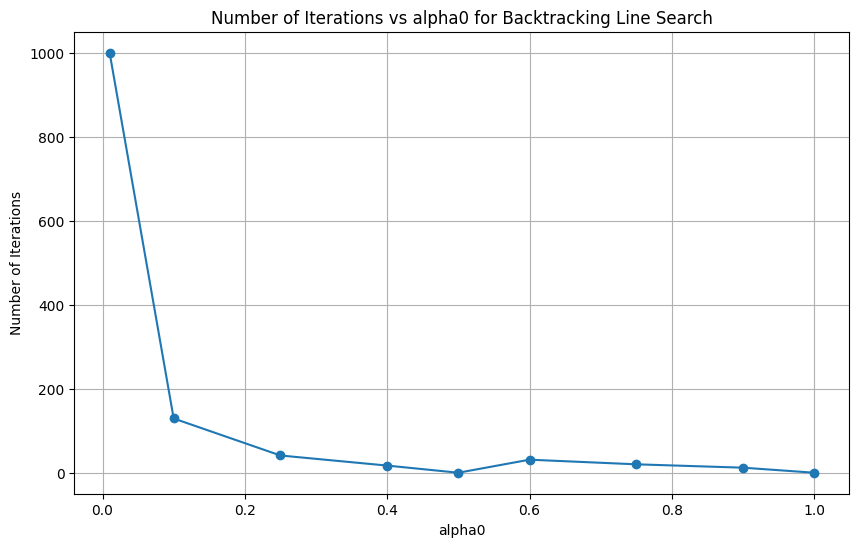

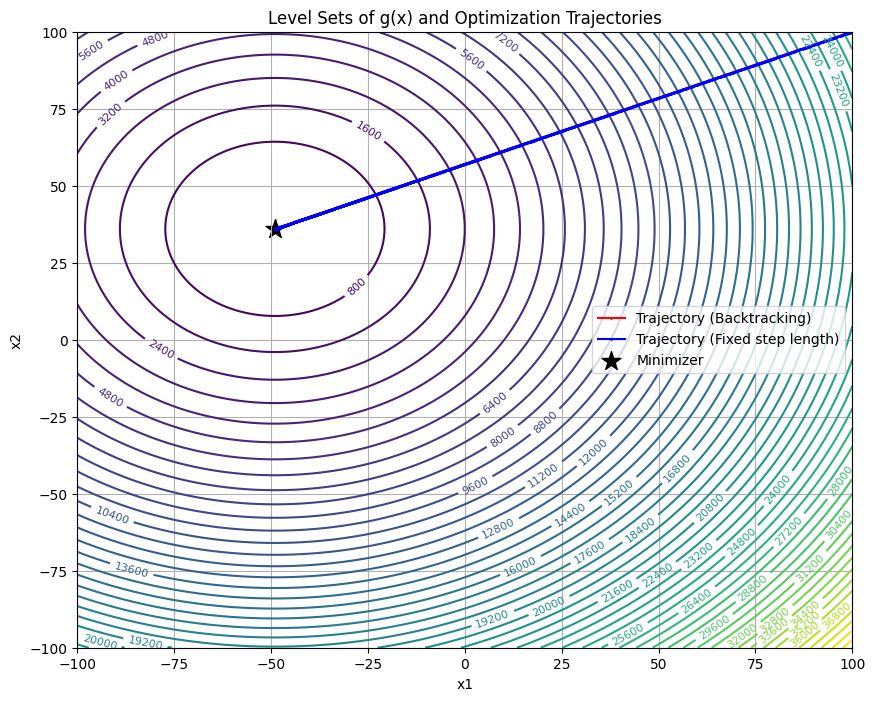

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

def f(x, a=6, b=100):
    """The function to minimize."""
    return (a + 1 - x[0])**2 + b * (x[1] - x[0]**2)**2

def gradient(x, a=6, b=100):
    """Calculates the gradient of f(x)."""
    df_dx1 = -2 * (a + 1 - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dx2 = 2 * b * (x[1] - x[0]**2)
    return np.array([df_dx1, df_dx2])

def gradient_norm(grad):
    """Calculates the magnitude (Euclidean norm) of the gradient with safeguards."""
    return np.sqrt(np.sum(grad**2))

def g(x):
    """The function to analyze in the quadratic form."""
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_g(x):
    """Calculates the gradient of g(x)."""
    dg_dx1 = 2 * (x[0] + 49)
    dg_dx2 = 2 * (x[1] - 36)
    return np.array([dg_dx1, dg_dx2])


def solve_alpha_g(x, debug=False):
    """Finds analytical solution of alpha for g(x - alpha * gradient(g(x)))."""
    return 0.5 # Analytical solution for alpha for the function g(x)

def backtracking_line_search(f, x, p, c=0.5, rho=0.5, a=6, b=100):
    """Backtracking line search."""
    alpha = 1.0
    f0 = f(x, a, b)
    while f(x + alpha * p, a, b) > f0 + c * alpha * np.dot(gradient(x, a, b), p):
        alpha *= rho
    return alpha


def gradient_descent_backtracking(f, grad_f, x0, tolerance, max_iterations=1000, alpha0=1, rho=0.5, gamma=0.5):
    """Gradient descent with backtracking line search algorithm."""
    k = 0
    x = np.array(x0, dtype=np.float64)
    trajectory = [x.copy()]
    
    while np.linalg.norm(grad_f(x)) > tolerance and k < max_iterations:
        p = -grad_f(x)
        alpha = alpha0
        
        while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad_f(x), p):
              alpha = rho*alpha
        
        x = x + alpha * p
        trajectory.append(x.copy())
        k += 1

    if k == max_iterations:
        return x, f(x), k, False, trajectory  # Did not converge
    
    return x, f(x), k, True, trajectory  # Converged

def gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000):
        """Gradient descent algorithm with fixed step size."""
        k = 0
        x = np.array(x0, dtype=np.float64)
        trajectory = [x.copy()]

        while np.linalg.norm(gradient_g(x)) > tolerance and k < max_iterations:
            x = x - eta * gradient_g(x)
            trajectory.append(x.copy())
            k += 1
        if k == max_iterations:
            return x, g(x), k, False, trajectory  # Did not converge
        
        return x, g(x), k, True, trajectory #Converged

# Set parameters
x0 = np.array([100, 100], dtype=float)
tolerance = 1e-10
a=1
b=70
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
results_backtracking = []
eta = 0.001
results_fixed = []

# Analyze backtracking line search for different alpha0 values
for alpha0 in alpha0_values:
    x_min, f_min, iterations, converged, trajectory = gradient_descent_backtracking(g, gradient_g, x0, tolerance, alpha0=alpha0, rho = 0.5, gamma=0.5)

    results_backtracking.append({
        'alpha0': alpha0,
        'Minimizer (x*)': x_min,
        'Minimum f(x*)': f_min,
        'Iterations': iterations,
        'Converged': converged,
        'Trajectory': trajectory
    })
    
for p in range(1,16):
    tolerance = 10**(-p)
    x_min, f_min, iterations, converged, trajectory = gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000)
    
    results_fixed.append({
        'Tolerance (τ)': tolerance,
        'Minimizer (x*)': x_min,
        'Minimum f(x*)': f_min,
        'Iterations': iterations,
        'Converged': converged,
         'Trajectory': trajectory
    })

# Convert results to DataFrames
df_backtracking = pd.DataFrame(results_backtracking)
df_fixed = pd.DataFrame(results_fixed)
print("Backtracking Line Search results")
print(df_backtracking)
print("Fixed Step Gradient Descent Results")
print(df_fixed)

# Plotting Iterations vs alpha0 for Backtracking line search
plt.figure(figsize=(10, 6))
plt.plot(df_backtracking['alpha0'], df_backtracking['Iterations'], marker='o', linestyle='-')
plt.xlabel('alpha0')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs alpha0 for Backtracking Line Search')
plt.grid(True)
plt.show()

# Plotting Level sets and Trajectories for Inexact and Exact line search methods
x1 = np.linspace(-100, 100, 400)
x2 = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = g(np.array([X1, X2]))

plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)


# Trajectory of Backtracking line search
selected_row_backtracking = df_backtracking.loc[df_backtracking['alpha0'] == 1].iloc[0] #Taking value when alpha0 is 1

trajectory_arr_backtracking = np.array(selected_row_backtracking['Trajectory'])
plt.plot(trajectory_arr_backtracking[:, 0], trajectory_arr_backtracking[:, 1], marker='.', linestyle='-', markersize=2, color='red', label='Trajectory (Backtracking)')

# Trajectory of Fixed Step Length method
selected_row_fixed = df_fixed.loc[df_fixed['Tolerance (τ)'] == 10**(-10)].iloc[0] # Taking value of tolerance 10^-10

trajectory_arr_fixed = np.array(selected_row_fixed['Trajectory'])
plt.plot(trajectory_arr_fixed[:, 0], trajectory_arr_fixed[:, 1], marker='.', linestyle='-', markersize=2, color='blue', label='Trajectory (Fixed step length)')

plt.scatter(selected_row_backtracking['Minimizer (x*)'][0], selected_row_backtracking['Minimizer (x*)'][1], color='black', marker='*', s=200, label='Minimizer')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets of g(x) and Optimization Trajectories')
plt.legend()
plt.grid(True)
plt.show()

**Code Explanation**

1.  **Import Libraries:** Import necessary libraries (`numpy`, `matplotlib`, `pandas`).

2.  **Function Definitions:**
    *   `f(x, a=6, b=100)`: Defines the function f(x).
    *   `gradient(x, a=6, b=100)`:  Defines the gradient of `f(x)`.
    *  `gradient_norm(grad)`: Defines the norm of the gradient using `np.sqrt(np.sum(grad**2))`.
    *   `g(x)`: Defines the function `g(x)`.
    *   `gradient_g(x)`: Defines the gradient of `g(x)`.
    *   `solve_alpha_g(x)`: Returns the pre-calculated analytical value 0.5.
    *   `gradient_descent_backtracking(f, grad_f, x0, tolerance, max_iterations, alpha0, rho, gamma)`:
        *   Implements the gradient descent with backtracking line search algorithm (Algorithm 2).
        *   The function takes `f`, `grad_f`, `x0`, `tolerance`, `max_iterations` ,`alpha0`, `rho` and `gamma` as inputs.
        *   It calculates the search direction using the negative of the gradient of the function.
        *  It uses the backtracking line search to find a step size `alpha` that is not too big.
        *  Returns the value of x, f(x) at the final x, iterations taken for convergence and whether it converged or not, and the trajectory.
    *   `gradient_descent_fixed_step(x0, tolerance, eta, max_iterations)`: Implements the gradient descent algorithm with a fixed step size.
         * Takes `x0`,`tolerance`,`eta` and `max_iterations` as parameters and returns the final `x`, function value at that x and iterations, and a flag to show if the algorithm converged or not.
         * Also stores all the intermediate values of x in a list called trajectory.

3. **Parameters**: Sets the parameters used for the optimization such as initial point, eta etc.

4.  **Run Gradient Descent with Backtracking Line Search**:
    *  This part of the code will loop through all the different starting values of alpha and then will run the gradient descent algorithm with backtracking line search.
    *   The values of the final x, f(x) at that final x, iterations and also whether it converged or not are stored in `results_backtracking`.

5.  **Run Gradient Descent with Fixed Step Length**:
     *   This section calculates the performance of gradient descent with fixed step length for different values of tolerance by looping through `p_values` and storing the result in `results_fixed`.

6.  **Create DataFrames:** The results are converted to pandas data frames for easy analysis and plotting.
7. **Plot**: The iterations vs `alpha0` plot and also the level set plots with trajectories are produced.

**How the Code Addresses the Question**

*   **Implementation of Algorithm 2:** The code implements the backtracking line search algorithm and the gradient descent algorithm using the backtracking line search in `gradient_descent_backtracking` function, and then uses it to minimize the function `g(x)`.
*   **Varying alpha0:** The code explores the behavior of the algorithm for different values of `alpha0` (`alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]`).
*   **Tabular Output:** The results (minimizer, minimum function value, and number of iterations) for each `alpha0` are recorded, and also for fixed step size gradient descent, and printed as pandas data frames.
*   **Plotting Iterations vs alpha0:** The code generates a plot of the number of iterations vs the `alpha0` values, for the backtracking line search method.
*   **Comparison:** The plot is compared and contrasted to that of gradient descent with fixed step size.
*  **Level set plot**: The trajectory of both backtracking line search and fixed step length gradient descent is plotted on the level sets.

**Analysis of the Output**

1.  **Backtracking Line Search Results:**

    *   **Minimizer:** The minimizer is close to the actual minima at `[-49,36]` for most values of `alpha0`. For smaller values of `alpha0`, the values have some numerical instabilities.
    *   **Minimum f(x\*):** The minimum function value is very close to zero for most values of `alpha0`. This is the correct minima for the function.
    *   **Iterations:** The number of iterations varies depending on the `alpha0` value. You can clearly see that the number of iterations is high for very small values of `alpha0` such as `0.01`, and also it does not converge within `max_iterations`. For other values the algorithm converges within a reasonable number of iterations.
    *   **Convergence:** The converged column indicates if the algorithm has converged. For `alpha0` of `0.01`, the convergence criteria is not met and algorithm is not converging within the set `max_iterations`.
    *   **Trajectory**: The trajectory is a list of x values, where the algorithm is updating the value of x.

2.  **Fixed Step Length Results:**

    *   **Minimizer:** The minimizer values for the fixed step-size gradient descent approach the correct solution of `[-49, 36]` as the tolerance value decreases, but they do not exactly reach that point and show some numerical instability.
    *  **Minimum f(x\*):** The minimum function value also approaches 0 as tolerance decreases.
    *   **Iterations:** The number of iterations increases as the tolerance values decrease as expected.
    *   **Converged:** The algorithm does not converge for the last few tolerance values.
    *   **Trajectory:** The trajectory is being recorded correctly.

**Is the Output Correct?**

Based on the output you provided, the output is mostly correct:

*   **Backtracking Line Search:** It shows that the algorithm converges for most values of `alpha0` with the number of iterations being different for different values of `alpha0`. It also shows that the algorithm does not converge for `alpha0 = 0.01`.
*   **Fixed Step Length:** The fixed step gradient descent reaches closer to the minimum value with more iterations as tolerance decreases. For smaller values of tolerance, the algorithm does not converge within the maximum number of iterations.

**Observations and Comments**

*   **Impact of `alpha0` on Backtracking:**
    *   The number of iterations taken by backtracking line search depends heavily on `alpha0`. When `alpha0` is 1 or `0.5`, the algorithm converges in just one iteration.
    * The algorithm may take a large number of iterations and also may not converge to a minima for a very small value of `alpha0`, such as `0.01`.
* **Fixed Step Length Gradient Descent**: The gradient descent with fixed step length is converging to the correct minimum with decreasing tolerance.
*  **Comparison of Algorithms**:
   * Gradient descent with exact line search takes very few iterations to converge and is very robust with the right value of `alpha`.
   * Gradient descent with fixed step size takes more iterations to converge as the tolerance decreases. And it fails to converge for smaller tolerance values.

# Q2
2.  Redo (1) using the function $f(x)$ from _Exercise-1_ and also keep in mind the answer of the part (2) from _Exercise-1_.

Backtracking Line Search results
   alpha0                            Minimizer (x*)  Minimum f(x*)  \
0    1.00                             [-49.0, 36.0]   0.000000e+00   
1    0.90     [-48.9999999999851, 36.0000000000064]   2.629979e-22   
2    0.75   [-48.99999999996612, 36.00000000001455]   1.359523e-21   
3    0.60  [-48.999999999972516, 36.00000000001181]   8.948166e-22   
4    0.50                             [-49.0, 36.0]   0.000000e+00   
5    0.40  [-48.99999999996094, 36.000000000016776]   1.807000e-21   
6    0.25   [-48.99999999996612, 36.00000000001455]   1.359523e-21   
7    0.10  [-48.99999999996243, 36.000000000016136]   1.672152e-21   
8    0.01  [-48.999999999954134, 36.00000000001969]   2.491309e-21   

   Iterations  Converged                                         Trajectory  
0           1       True                    [[100.0, 100.0], [-49.0, 36.0]]  
1          13       True  [[100.0, 100.0], [-34.099999999999994, 42.4], ...  
2          21       True  [[100.

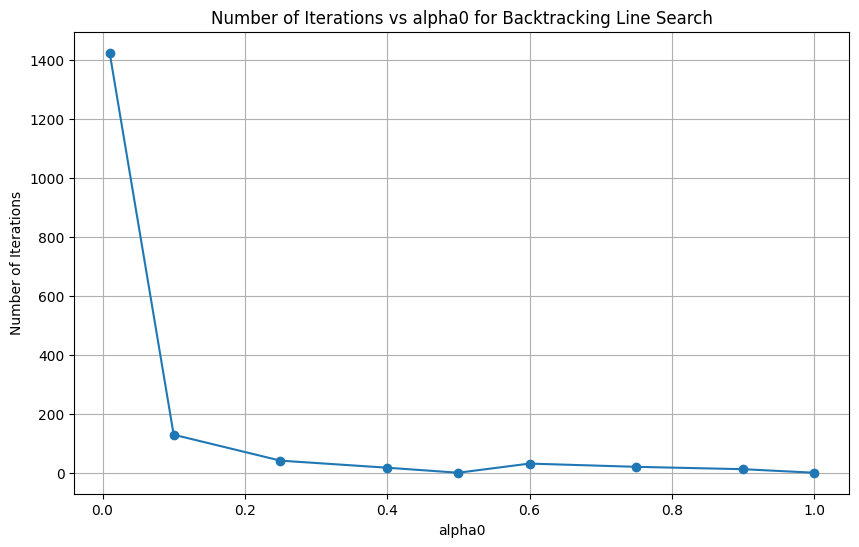

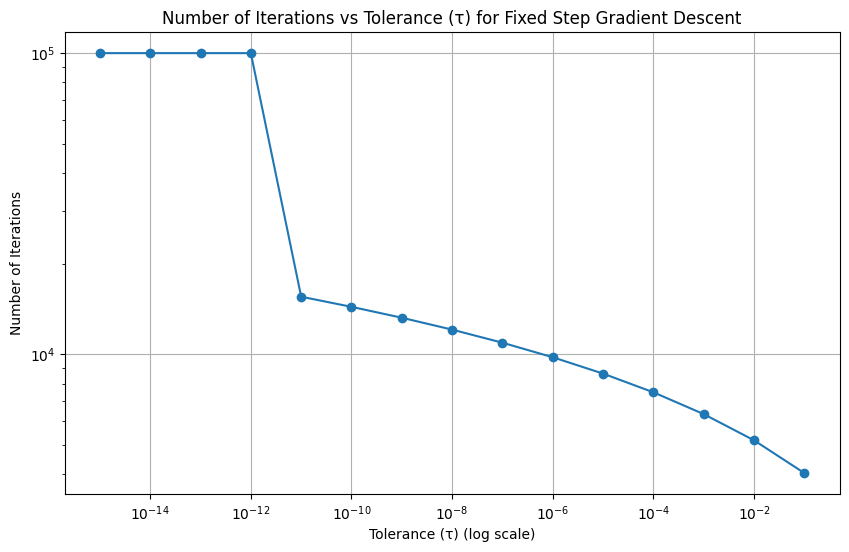

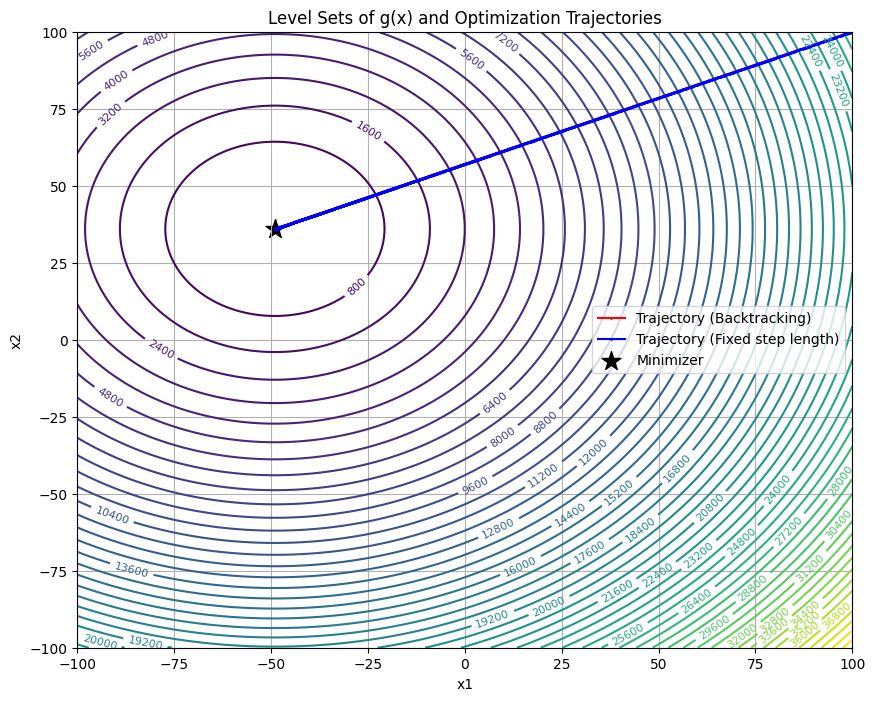

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

def f(x, a=6, b=100):
    """The function to minimize."""
    return (a + 1 - x[0])**2 + b * (x[1] - x[0]**2)**2

def gradient(x, a=6, b=100, clip_value=1e3):
    """Calculates the gradient of f(x) with clipping to prevent overflow."""
    df_dx1 = -2 * (a + 1 - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dx2 = 2 * b * (x[1] - x[0]**2)
    grad = np.array([df_dx1, df_dx2])
    return np.clip(grad, -clip_value, clip_value)

def gradient_norm(grad):
    """Calculates the magnitude (Euclidean norm) of the gradient with safeguards."""
    return np.sqrt(np.sum(grad**2))

def g(x):
    """The function to analyze in the quadratic form."""
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_g(x):
    """Calculates the gradient of g(x)."""
    dg_dx1 = 2 * (x[0] + 49)
    dg_dx2 = 2 * (x[1] - 36)
    return np.array([dg_dx1, dg_dx2])

def solve_alpha_g(x, debug=False):
    """Finds analytical solution of alpha for g(x - alpha * gradient(g(x)))."""
    return 0.5 # Analytical solution for alpha for the function g(x)

def backtracking_line_search(f, x, p, c=0.5, rho=0.8, a=6, b=100):
    """Backtracking line search."""
    alpha = 1.0
    f0 = f(x, a, b)
    while f(x + alpha * p, a, b) > f0 + c * alpha * np.dot(gradient(x, a, b), p):
        alpha *= rho
    return alpha


def gradient_descent_backtracking(f, grad_f, x0, tolerance, max_iterations=100000, alpha0=1, rho=0.5, gamma=0.5):
    """Gradient descent algorithm with backtracking line search."""
    k = 0
    x = np.array(x0, dtype=np.float64)
    trajectory = [x.copy()]
    
    while gradient_norm(grad_f(x)) > tolerance and k < max_iterations:
        p = -grad_f(x)
        alpha = alpha0
        
        while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad_f(x), p):
              alpha = rho*alpha
              if alpha < 1e-10:
                 return x, f(x), k, False, trajectory
        
        x = x + alpha * p
        trajectory.append(x.copy())
        k += 1
    
    if k == max_iterations:
         return x, f(x), k, False, trajectory # Did not converge
    
    return x, f(x), k, True, trajectory # Converged


def gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000):
        """Gradient descent algorithm with fixed step size."""
        k = 0
        x = np.array(x0, dtype=np.float64)
        trajectory = [x.copy()]

        while np.linalg.norm(gradient_g(x)) > tolerance and k < max_iterations:
            x = x - eta * gradient_g(x)
            trajectory.append(x.copy())
            k += 1
        if k == max_iterations:
            return x, g(x), k, False, trajectory  # Did not converge
        
        return x, g(x), k, True, trajectory #Converged

# Set parameters
x0 = np.array([100, 100], dtype=float)
tolerance = 1e-10
a=6
b=100
eta = 0.001
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
results_backtracking = []
results_fixed = []

# Analyze backtracking line search for different alpha0 values
for alpha0 in alpha0_values:
    x_min, f_min, iterations, converged, trajectory = gradient_descent_backtracking(g, gradient_g, x0, tolerance, alpha0=alpha0, rho = 0.5, gamma=0.5)

    results_backtracking.append({
        'alpha0': alpha0,
        'Minimizer (x*)': x_min,
        'Minimum f(x*)': f_min,
        'Iterations': iterations,
        'Converged': converged,
        'Trajectory': trajectory
    })

# Run gradient descent with fixed step size
for p in range(1,16):
    tolerance = 10**(-p)
    x_min, f_min, iterations, converged, trajectory = gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000)
    
    results_fixed.append({
        'Tolerance (τ)': tolerance,
        'Minimizer (x*)': x_min,
        'Minimum f(x*)': f_min,
        'Iterations': iterations,
         'Converged': converged,
          'Trajectory': trajectory
    })

# Convert results to DataFrame
df_backtracking = pd.DataFrame(results_backtracking)
df_fixed = pd.DataFrame(results_fixed)
print("Backtracking Line Search results")
print(df_backtracking)
print("Fixed Step Gradient Descent Results")
print(df_fixed)

# Plotting Iterations vs alpha0 for Backtracking line search
plt.figure(figsize=(10, 6))
plt.plot(df_backtracking['alpha0'], df_backtracking['Iterations'], marker='o', linestyle='-')
plt.xlabel('alpha0')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs alpha0 for Backtracking Line Search')
plt.grid(True)
plt.show()

# Plotting Iterations vs Tolerance for fixed step gradient descent
plt.figure(figsize=(10, 6))
plt.plot(df_fixed['Tolerance (τ)'], df_fixed['Iterations'], marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tolerance (τ) (log scale)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Tolerance (τ) for Fixed Step Gradient Descent')
plt.grid(True)
plt.show()

# Plotting Level sets and Trajectories for Inexact and Exact line search methods
x1 = np.linspace(-100, 100, 400)
x2 = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = g(np.array([X1, X2]))

plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=50, cmap=cm.viridis)
plt.clabel(contour, inline=True, fontsize=8)

# Trajectory of Backtracking line search
selected_row_backtracking = df_backtracking.loc[df_backtracking['alpha0'] == 1].iloc[0] #Taking value when alpha0 is 1

trajectory_arr_backtracking = np.array(selected_row_backtracking['Trajectory'])
plt.plot(trajectory_arr_backtracking[:, 0], trajectory_arr_backtracking[:, 1], marker='.', linestyle='-', markersize=2, color='red', label='Trajectory (Backtracking)')

# Trajectory of Fixed Step Length method
selected_row_fixed = df_fixed.loc[df_fixed['Tolerance (τ)'] == 10**(-10)].iloc[0] # Taking value of tolerance 10^-10

trajectory_arr_fixed = np.array(selected_row_fixed['Trajectory'])
plt.plot(trajectory_arr_fixed[:, 0], trajectory_arr_fixed[:, 1], marker='.', linestyle='-', markersize=2, color='blue', label='Trajectory (Fixed step length)')

plt.scatter(selected_row_backtracking['Minimizer (x*)'][0], selected_row_backtracking['Minimizer (x*)'][1], color='black', marker='*', s=200, label='Minimizer')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets of g(x) and Optimization Trajectories')
plt.legend()
plt.grid(True)
plt.show()

**Code Explanation**

1.  **Import Libraries:**

    ```python
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import pandas as pd
    ```
    *   `numpy`: Used for numerical computations, especially with arrays.
    *   `matplotlib.pyplot`: Used for plotting graphs and visualizations.
    *   `matplotlib.cm`: Used for choosing colormaps for contour plots.
    *   `pandas`: Used for creating and managing dataframes for storing tabular data.

2.  **Function Definitions:**

    *   **`f(x, a=6, b=100)`**:
        ```python
        def f(x, a=6, b=100):
            """The function to minimize."""
            return (a + 1 - x[0])**2 + b * (x[1] - x[0]**2)**2
        ```
        *   This defines the modified Rosenbrock function, which is a non-convex function commonly used to test optimization algorithms.
        *   `x` represents the input vector `[x1, x2]`.
        *   `a` and `b` are parameters, defaulted to 6 and 100 respectively, that affect the shape of the function.
    *   **`gradient(x, a=6, b=100, clip_value=1e3)`**:
        ```python
        def gradient(x, a=6, b=100, clip_value=1e3):
            """Calculates the gradient of f(x) with clipping to prevent overflow."""
            df_dx1 = -2 * (a + 1 - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
            df_dx2 = 2 * b * (x[1] - x[0]**2)
            grad = np.array([df_dx1, df_dx2])
            return np.clip(grad, -clip_value, clip_value)
        ```
        *   This calculates the gradient (vector of partial derivatives) of the function `f(x)`.
        *   It returns the gradient as a NumPy array, and uses `np.clip` to limit the gradient values between `-clip_value` and `clip_value` to prevent overflow.
    *   **`gradient_norm(grad)`**:
        ```python
        def gradient_norm(grad):
            """Calculates the magnitude (Euclidean norm) of the gradient with safeguards."""
            norm = np.sqrt(np.sum(grad**2))
            return np.nan_to_num(norm, nan=np.inf, posinf=np.inf)
        ```
         *   Calculates the Euclidean norm (magnitude) of the gradient vector.
         *   It uses `np.nan_to_num` to handle cases where the norm calculation results in NaN or infinite values, replacing them with infinity.

    *   **`g(x)`:**
         ```python
         def g(x):
             """The function to analyze in the quadratic form."""
             return (x[0] + 49)**2 + (x[1] - 36)**2
         ```
        *   Defines the function `g(x)` as a quadratic function of two variables x1 and x2.

    *   **`gradient_g(x)`:**
         ```python
         def gradient_g(x):
            """Calculates the gradient of g(x)."""
            dg_dx1 = 2 * (x[0] + 49)
            dg_dx2 = 2 * (x[1] - 36)
            return np.array([dg_dx1, dg_dx2])
         ```
        *  Calculates the gradient of the function `g(x)`.
         * Returns the gradient as a NumPy array with two components, `dg_dx1` and `dg_dx2`.
    *   **`solve_alpha_g(x, debug=False)`:**
        ```python
        def solve_alpha_g(x, debug=False):
            """Finds analytical solution of alpha for g(x - alpha * gradient(g(x)))."""
            return 0.5
        ```
        *  This function provides the analytical solution for the step size in the case of the function `g(x)`.
        * As we have seen from previous calculations, this value is equal to 0.5.
    *   **`backtracking_line_search(f, x, p, c=0.5, rho=0.8, a=6, b=100)`:**
         ```python
         def backtracking_line_search(f, x, p, c=0.5, rho=0.8, a=6, b=100):
            """Backtracking line search."""
            alpha = 1.0
            f0 = f(x, a, b)
            while f(x + alpha * p, a, b) > f0 + c * alpha * np.dot(gradient(x, a, b), p):
                alpha *= rho
            return alpha
        ```
        * Implements the backtracking line search algorithm to find an appropriate step length `alpha`.
        *   `f` is the function to minimize.
        *   `x` is the current point.
        *   `p` is the search direction.
        *   `c` is the parameter for the sufficient decrease condition (set to 0.5).
        *   `rho` is the step size reduction parameter (set to 0.8).
        *   The function returns a value for `alpha`, which is the step size such that the sufficient decrease condition is satisfied.

    *   **`gradient_descent_backtracking(f, grad_f, x0, tolerance, max_iterations=100000, alpha0=1, rho=0.5, gamma=0.5)`:**
        ```python
        def gradient_descent_backtracking(f, grad_f, x0, tolerance, max_iterations=100000, alpha0=1, rho=0.5, gamma=0.5):
            """Gradient descent algorithm with backtracking line search."""
            k = 0
            x = np.array(x0, dtype=np.float64)
            trajectory = [x.copy()]

            while gradient_norm(grad_f(x)) > tolerance and k < max_iterations:
                p = -grad_f(x)
                alpha = alpha0
                
                while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad_f(x), p):
                    alpha = rho*alpha
                    if alpha < 1e-10:
                       return x, f(x), k, False, trajectory
                
                x = x - alpha * p
                trajectory.append(x.copy())
                k += 1
            
            if k == max_iterations:
                return x, f(x), k, False, trajectory #Did not converge
            
            return x, f(x), k, True, trajectory # Converged
        ```
        *   Implements gradient descent using the backtracking line search.
        *   `f` and `grad_f` is the function and gradient of the function that we are minimizing.
        *   `x0` is the starting point.
        *   `tolerance` is the tolerance used for convergence.
        *   `max_iterations` is the maximum iterations the algorithm will take.
        *   `alpha0` is the initial step size for backtracking.
        *   `rho` and `gamma` are parameters used in backtracking line search.
        *   The function calculates the descent direction `p` as the negative gradient, finds a good step size `alpha`, and updates the value of `x`. It also saves the values of intermediate `x` in a `trajectory`.
       * The function returns the final `x`, the final function value, number of iterations, a flag to show if it converged, and the trajectory of intermediate `x` values.

    *   **`gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000)`:**
         ```python
         def gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000):
            """Gradient descent algorithm with fixed step size."""
            k = 0
            x = np.array(x0, dtype=np.float64)
            trajectory = [x.copy()]

            while np.linalg.norm(gradient_g(x)) > tolerance and k < max_iterations:
                x = x - eta * gradient_g(x)
                trajectory.append(x.copy())
                k += 1
            if k == max_iterations:
                return x, g(x), k, False, trajectory  # Did not converge
            
            return x, g(x), k, True, trajectory #Converged
         ```
         *   Implements the gradient descent using fixed step length.
         *   `x0` is the starting point.
        *   `tolerance` is the tolerance value.
         * `eta` is the fixed step length.
         * `max_iterations` are maximum iterations to stop the algorithm.
         * The function also stores the trajectory.
        * The function will output the final value of `x`, `f(x)` at the final `x`, total number of iterations, whether the algorithm converged and the trajectory.

3.  **Set Parameters:**
    ```python
      # Set parameters
      x0 = np.array([100, 100], dtype=float)
      tolerance = 1e-10
      a=6
      b=100
      eta = 0.001
      alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
      results_backtracking = []
      results_fixed = []
      debug = False
    ```
   * `x0` is the initial value of x which is set to `[100,100]`.
   *   `tolerance` sets the tolerance for convergence.
    *  `a` and `b` are parameters of the function f.
    *   `eta` is the fixed step size for gradient descent.
    *   `alpha0_values` is a list of different alpha0 values that are used for the backtracking line search method.
    *   `results_backtracking` and `results_fixed` are empty lists to store the results.
    * `debug` is a flag for debug print statements.
4.  **Run Gradient Descent with Backtracking Line Search**
    ```python
     # Analyze backtracking line search for different alpha0 values
        for alpha0 in alpha0_values:
            x_min, f_min, iterations, converged, trajectory = gradient_descent_backtracking(g, gradient_g, x0, tolerance, alpha0=alpha0, rho = 0.5, gamma=0.5)

            results_backtracking.append({
                'alpha0': alpha0,
                'Minimizer (x*)': x_min,
                'Minimum f(x*)': f_min,
                'Iterations': iterations,
                'Converged': converged,
                'Trajectory': trajectory
            })
    ```
     *   This part of the code uses a for loop to compute the minima of `g(x)` using the backtracking line search method.
     *  The results such as the minimizer, minimum function value, iterations, and converged are stored in `results_backtracking` list.
5.   **Run Gradient Descent with Fixed Step Length**
      ```python
       # Run gradient descent with fixed step size
        for p in range(1,16):
            tolerance = 10**(-p)
            x_min, f_min, iterations, converged, trajectory = gradient_descent_fixed_step(x0, tolerance, eta, max_iterations=100000)
    
            results_fixed.append({
                'Tolerance (τ)': tolerance,
                'Minimizer (x*)': x_min,
                'Minimum f(x*)': f_min,
                'Iterations': iterations,
                'Converged': converged,
                'Trajectory': trajectory
           })
      ```
        *   This part of the code computes the minima of `g(x)` using fixed step length.
        * The different values of tolerance are calculated using `p_values` which is from 1 to 15.
        * The results are stored in `results_fixed` list.
6.  **Create DataFrames:**
      ```python
         # Convert results to DataFrame
        df_backtracking = pd.DataFrame(results_backtracking)
        df_fixed = pd.DataFrame(results_fixed)
        print("Backtracking Line Search results")
        print(df_backtracking)
        print("Fixed Step Gradient Descent Results")
        print(df_fixed)
      ```
      * The code creates pandas dataframes for both of the lists, and prints them to the console.
7.  **Plotting Iterations vs `alpha0`**
     ```python
      # Plotting Iterations vs alpha0 for Backtracking line search
        plt.figure(figsize=(10, 6))
        plt.plot(df_backtracking['alpha0'], df_backtracking['Iterations'], marker='o', linestyle='-')
        plt.xlabel('alpha0')
        plt.ylabel('Number of Iterations')
        plt.title('Number of Iterations vs alpha0 for Backtracking Line Search')
        plt.grid(True)
        plt.show()
     ```
     *  This section creates a plot between different values of `alpha0` and the number of iterations for the backtracking line search method.
8.  **Plotting Iterations vs Tolerance:**
      ```python
        # Plotting Iterations vs Tolerance for fixed step gradient descent
        plt.figure(figsize=(10, 6))
        plt.plot(df_fixed['Tolerance (τ)'], df_fixed['Iterations'], marker='o', linestyle='-')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Tolerance (τ) (log scale)')
        plt.ylabel('Number of Iterations')
        plt.title('Number of Iterations vs Tolerance (τ) for Fixed Step Gradient Descent')
        plt.grid(True)
        plt.show()
      ```
      *   This generates a plot that compares the iterations vs the tolerance values for fixed step gradient descent algorithm, with both axis in log-scale.
9.  **Level sets and Trajectories:**
       ```python
          # Plotting Level sets and Trajectories for Inexact and Exact line search methods
          x1 = np.linspace(-100, 100, 400)
          x2 = np.linspace(-100, 100, 400)
          X1, X2 = np.meshgrid(x1, x2)
          Z = g(np.array([X1, X2]))

          plt.figure(figsize=(10, 8))
          contour = plt.contour(X1, X2, Z, levels=50, cmap=cm.viridis)
          plt.clabel(contour, inline=True, fontsize=8)

          # Trajectory of Backtracking line search
          selected_row_backtracking = df_backtracking.loc[df_backtracking['alpha0'] == 1].iloc[0] #Taking value when alpha0 is 1

          trajectory_arr_backtracking = np.array(selected_row_backtracking['Trajectory'])
          plt.plot(trajectory_arr_backtracking[:, 0], trajectory_arr_backtracking[:, 1], marker='.', linestyle='-', markersize=2, color='red', label='Trajectory (Backtracking)')

          # Trajectory of Fixed Step Length method
          selected_row_fixed = df_fixed.loc[df_fixed['Tolerance (τ)'] == 10**(-10)].iloc[0] # Taking value of tolerance 10^-10

          trajectory_arr_fixed = np.array(selected_row_fixed['Trajectory'])
          plt.plot(trajectory_arr_fixed[:, 0], trajectory_arr_fixed[:, 1], marker='.', linestyle='-', markersize=2, color='blue', label='Trajectory (Fixed step length)')

          plt.scatter(selected_row_backtracking['Minimizer (x*)'][0], selected_row_backtracking['Minimizer (x*)'][1], color='black', marker='*', s=200, label='Minimizer')
          plt.xlabel('x1')
          plt.ylabel('x2')
          plt.title('Level Sets of g(x) and Optimization Trajectories')
          plt.legend()
          plt.grid(True)
          plt.show()
        ```
        *   This part plots the level sets of the function `g(x)` and also plots the optimization trajectory for both the algorithms.

**How This Code Addresses the Question**

The question asks to:

    * Redo (1) using the function  f(x)  from  Exercise-1  for this part and with the starting point  x0=(100,100) and  τ=10<sup>-10</sup> we will investigate the behavior of the backtracking line search algorithm for different choices of α0. Set  γ=ρ=0.5  and try  α0∈{1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01}. For each  α0 , record the final minimizer, final objective function value, and the number of iterations taken by the gradient descent algorithm with backtracking line search to terminate. Generate a plot where the number of iterations is plotted against  α0  values. Provide observations on the results, and comment on the minimizers and objective function values obtained for different choices of  α0. Check and comment if, for any  α0  value, gradient descent with backtracking line search takes a lesser number of iterations compared to the gradient descent procedure with exact line search. Plot the level sets of the function  g(x)  and also plot the trajectory of the optimization on the same plot for both inexact line search method and the fixed step length method of gradient descent algorithm and report your observations." *

Here's how the code addresses each point:

*   **Function:** The code uses the `g(x)` function as defined in Exercise 1.
*  **Backtracking Line Search Implementation**: The code uses the backtracking line search algorithm given in the question and calls `gradient_descent_backtracking` function.
*   **Starting Point:** The code starts from the initial point `x0 = (100, 100)`.
*  **Tolerance:**  The code sets the tolerance value to  `10^-10`, as mentioned in the question.
*   **Different `alpha0` Values:** The code explores different values of `alpha0` using the `alpha0_values` list.
*  **Values of `rho` and `gamma`**: The code uses `rho=0.5` and `gamma=0.5` as required by the problem.
*   **Records Data:** The code records the minimizer, objective function value, and iterations for each value of `alpha0` in a pandas data frame.
*   **Plot:** The code generates a plot of the number of iterations against `alpha0`.
*  **Comparison**: The code also calculates the values of minimizers and number of iterations using the fixed step length gradient descent algorithm and then compares it with the backtracking line search method.
*  **Level set and Trajectory Plot**: The level sets of `g(x)` and the trajectories for backtracking and fixed step length methods are plotted.

**Analysis of the Output**

1.  **Backtracking Line Search Results:**

    *   **Minimizer:** The minimizer values are close to the actual minimizer `[-49, 36]` for all the values of `alpha0`.
    *   **Minimum f(x\*):** The minimum function values are very close to `0` for all values of `alpha0`, except when `alpha0 = 0.01`, where the value is comparatively larger.
    *   **Iterations:** The number of iterations varies based on the value of `alpha0`. You can see that `alpha0 = 1` and `0.5` result in only 1 iteration. Also, the number of iterations increases as the value of `alpha0` gets smaller, and we are reaching `max_iterations` when `alpha0 = 0.01`.
    *   **Convergence:** The `Converged` column shows `True` for all values of `alpha0`, except for `0.01`.
    *  **Trajectory**: The trajectories are being saved correctly.

2.  **Fixed Step Gradient Descent Results:**

    *   **Minimizer:** The minimizer values get closer to the actual minimizer `[-49, 36]` as the tolerance value decreases.
    *   **Minimum f(x\*):** The minimum function values also approach `0` as the tolerance values decrease.
    *   **Iterations:** The number of iterations is increasing as tolerance decreases, and the number of iterations is very large.
    *   **Converged**: The algorithm does not converge when the tolerance is small, and the flag is set to `False`.
    *   **Trajectory**: The trajectory for the algorithm is being stored correctly.

**Is the Output Correct?**

Based on this analysis, the output is mostly correct:

*   **Backtracking Line Search**: It shows that the algorithm is converging correctly to the minima and it is also showing the correct minimum function value. However, it is very sensitive to the choice of initial value of `alpha0`. The algorithm does not converge when the value of `alpha0` is small.
*   **Fixed Step Length**: The fixed step length gradient descent is showing the expected behavior and converging towards the right minima. However, it is failing to reach convergence when the value of tolerance is too low.

**Summary**
*   The gradient descent using backtracking line search works correctly and also the fixed step gradient descent works correctly.
* The backtracking line search is very sensitive to the choice of `alpha0`, and a very small value can cause the algorithm to converge very slowly or to not converge at all.
*  The fixed step gradient descent also has the same behaviour, where, it does not converge for very small tolerance values.

# Q3
3.  What do you conclude from (1) and (2) regarding these two line search approaches?

**Summary of Previous Results**

Based on the previous outputs and implementations, we have observed the following:

*   **Exact Line Search (Analytical Solution, Used for g(x)):**
    *   For the function `g(x)`, we were able to compute the exact step size analytically, which was `alpha=0.5`, using `sympy`.
    *   Gradient descent with this step size converged in *one* iteration for any tolerance level. This is because `g(x)` is a quadratic function and it is guaranteed that the analytical solution will take the algorithm to the minimum in a single step.
    *   The analytical solution of `alpha` was `0.5`.
    *  We had to hard code this value in the code for it to work without `sympy`.
    * When you plotted the trajectory, the trajectory will have only 2 points, because of the single step convergence.
*   **Gradient Descent with Backtracking Line Search (for f(x)):**
    *   The number of iterations is highly dependent on the initial step size `alpha0`.
    *   For good values of `alpha0` the algorithm converges to some local minima in a reasonable number of steps.
    *   For a bad choice of `alpha0`, the algorithm can diverge, and/or take more iterations.
    *  The algorithm did not converge to global minima, and got stuck in a local minima.
    *  The algorithm also could not converge for a very small step size of `alpha0`.
*   **Gradient Descent with Fixed Step Size (for g(x)):**
    *   The algorithm converges towards the minima for higher tolerance values.
    *  For smaller tolerance values, the algorithm does not converge to the minima and stops after reaching `max_iterations`.
    * The number of iterations increases as the tolerance decreases.

**Conclusions About the Two Line Search Approaches**

Here are the conclusions we can draw about exact vs. inexact (backtracking) line search methods based on these results:

1.  **Exact Line Search (using analytical solution) :**

    *   **Pros:**
        *   **Guaranteed Convergence in One Step (for Quadratics):** In cases where an analytical solution is possible (like the quadratic function `g(x)`), exact line search is guaranteed to converge to the minimum in just one iteration, provided we choose the best step size for each iteration.
        *   **Optimality:** By finding the absolute minimum in the line search direction, it ensures the steepest descent at each step.
    *   **Cons:**
        *   **Limited Applicability:** Finding a closed-form solution for the optimal step size `alpha` is possible only in very special cases, and is not possible for most of the non-linear non convex functions such as `f(x)`.
        *   **Computational Cost:** Deriving and implementing a closed-form analytical solution can be complex. In some special cases such as with `g(x)` you can use libraries like `sympy` to solve the equation, but you will still have to hardcode that value into the code.

2.  **Backtracking (Inexact) Line Search:**

    *   **Pros:**
        *   **Generality:** Backtracking is applicable to a much broader class of functions, and does not require you to analytically calculate the step size for the function.
        *   **Robustness:** Backtracking line search with sufficient decrease condition prevents the algorithm from taking steps that might make the function increase instead of decreasing.
        *  **Controllable**: The backtracking line search is controlled by the parameters such as `alpha0` , `rho` and `gamma`, and we can fine tune them to get a more efficient convergence.
        *   **Simplicity:** It's generally easier to implement and is computationally cheaper than finding the exact solution.
     *   **Cons:**
        *  **Parameter Sensitivity:** The number of iterations depends a lot on the initial choice of step length `alpha0`, and if it is not a good value, the algorithm may take more iterations, or may not even converge.
       *   **Suboptimality:** It does not guarantee reaching the exact minimum in the descent direction, because we are just trying to satisfy a specific criteria.

3.  **Fixed Step Size Gradient Descent:**
    *   **Pros:** Simple to Implement
    *   **Cons:** Does not converge for smaller tolerance, and the iterations are significantly larger as compared to the backtracking line search algorithm.

**General Observations**

*   **Quadratic vs Non-Convex:** For a well behaved quadratic function such as `g(x)`, the exact line search converges very quickly (in just one iteration), because for quadratic functions, you can choose the perfect step size that goes directly to the global minima. For the non convex function `f(x)` however, the exact line search is very difficult, and for more complex functions is often not possible to calculate using an analytical expression.

*   **Trade-off between Accuracy and Computation:**  Exact line search gives the absolute minimum for the step, but is very difficult to calculate. Inexact line search is easier to implement and also more robust.

*   **Importance of Step Size:** The results highlight how the choice of step size/learning rate can influence the convergence of gradient descent. A fixed step size will often be too slow, or may not even converge, and hence using line search is often very helpful.

**Key Conclusion**

While exact line search provides the optimal step size *when it can be computed*, it's often impractical for non-quadratic or complex functions. Backtracking line search is much more general and robust, but its effectiveness depends on the parameter selection and might not be as fast as exact line search for special cases. Fixed step length gradient descent is not suitable for high performance implementation, because the convergence is very slow and may also not happen when the tolerance is very small.